<a href="https://colab.research.google.com/github/sakur7a/CS61A-Spring-2024/blob/main/HW01/Gen_AI_ML_Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GenAI_ML_HW1
Objective

1.   Be familiar with google colab
2.   Understand the concepts of tokens, tokenizers, prompting, and chat templates.
3. Observe how the model behave with different prompt setting
4. Learn how to build some simple user interface with Gradio




# Activate GPU

To enable GPU, please follow these steps:

1. Click on "Runtime" (or "執行階段") in the header.
2. Click on "Change runtime type" (or "變更執行階段類型") in the drop menu.
3. Select "T4 GPU" and save. (You can select "A100 GPU" or "V100 GPU" if you have Colab Pro)
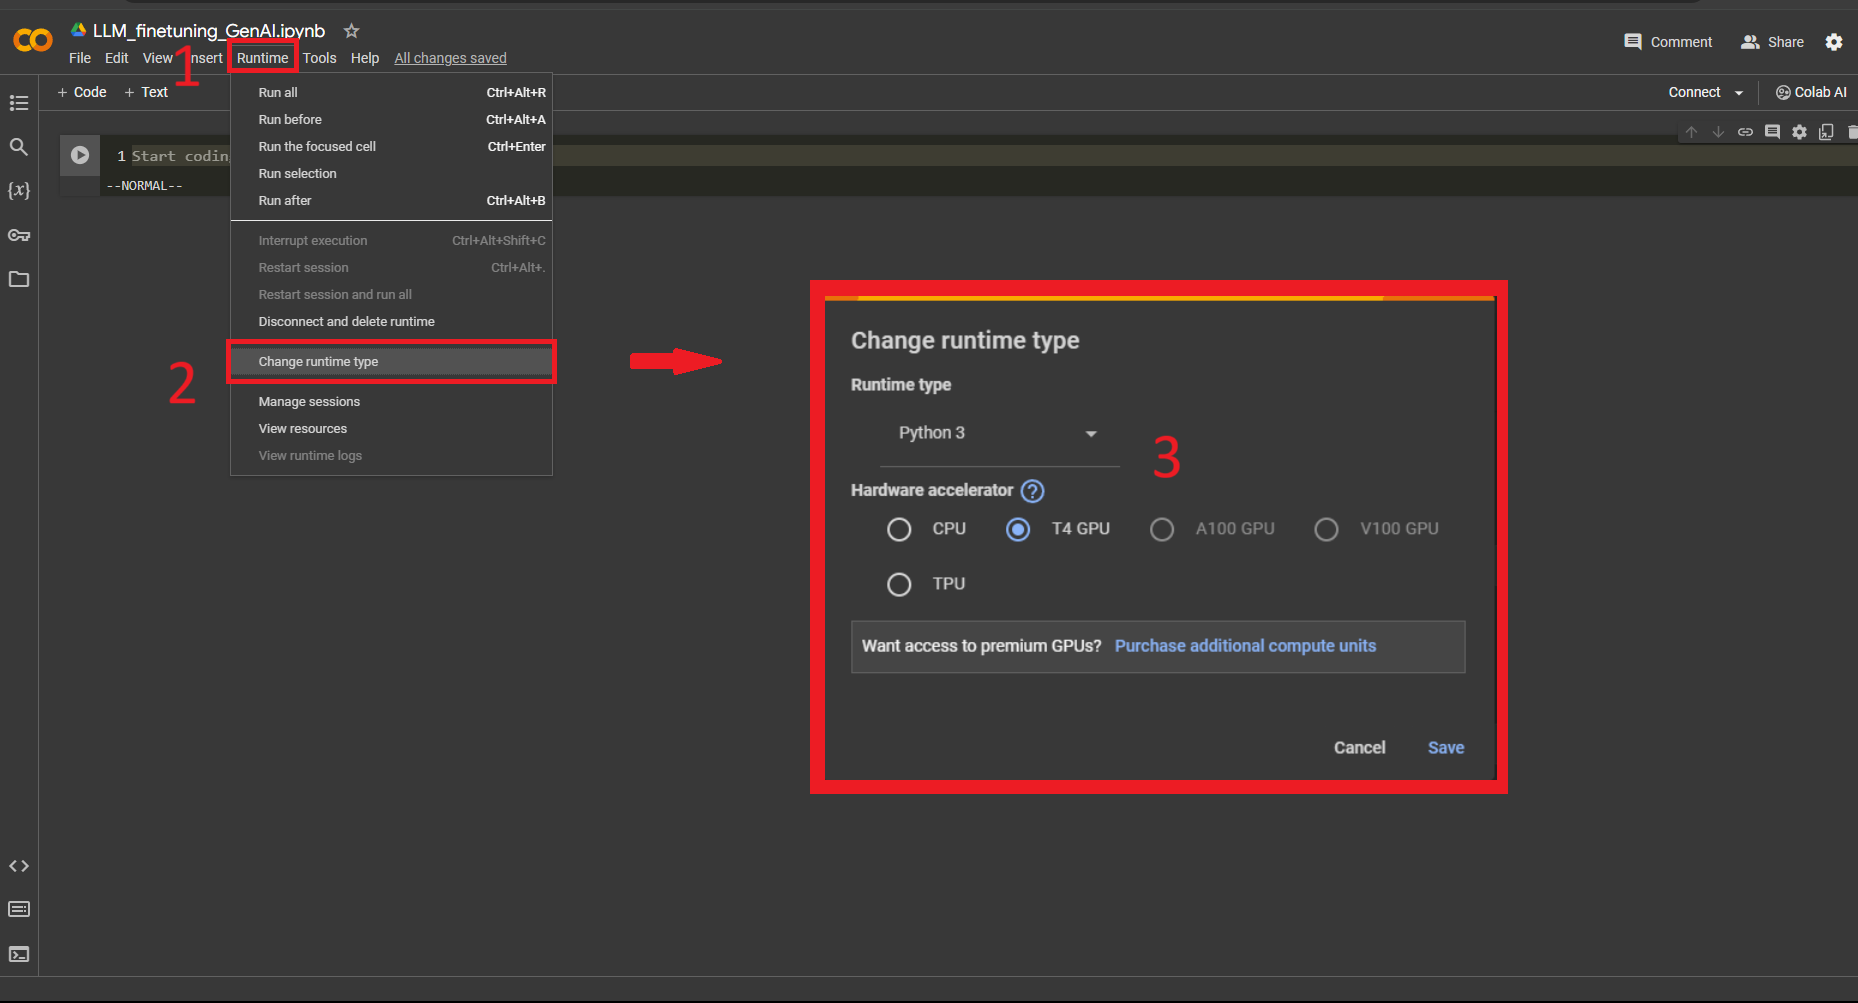


# Check GPU

In [ ]:
!nvidia-smi

# Download and Install Dependencies
This section sets up the required libraries for working with Large Language Models (LLMs)

In [ ]:
# Uninstall potentially conflicting versions of core libraries
# This prevents version mismatches that could cause runtime errors
! pip uninstall -y transformers tokenizers huggingface_hub torch

# Install fresh versions of essential libraries for LLM work:
# - transformers: HuggingFace library for pre-trained models and tokenizers
# - torch: PyTorch deep learning framework (backend for transformers)
# - torchvision: Computer vision utilities (often required as dependency)
! pip install transformers torch torchvision

In [ ]:
# Authentication Setup for HuggingFace Hub Access

# Import essential libraries:
# - torch: PyTorch tensor computation library
# - login: HuggingFace authentication function
import torch
from huggingface_hub import login

# IMPORTANT: HuggingFace Authentication Token Required
# This token allows access to gated models that require user agreement
# To get a token: Visit huggingface.co -> Settings -> Access Tokens -> Create new token

# TODO: Replace with your personal HuggingFace token for model access
login(token="Your HF token", new_session=False)

# Part 1: Understanding Tokens in Large Language Models

## Educational Objectives:
1. **Token-Level Implementation**: Learn how LLMs process text at the token level (not word level)
2. **Practical Application**: Use actual tokenizer and model components to understand token mechanics  
3. **Assessment**: Apply knowledge to answer questions in NTUcool platform

## Key Concepts:
- **Tokenization**: Process of converting human-readable text into numerical tokens that models can process
- **Vocabulary**: The complete set of tokens that a model understands (typically 30k-100k+ tokens)
- **Token IDs**: Numerical representations that map to specific text pieces (subwords, characters, or symbols)

### The below block is for Question 1 to 3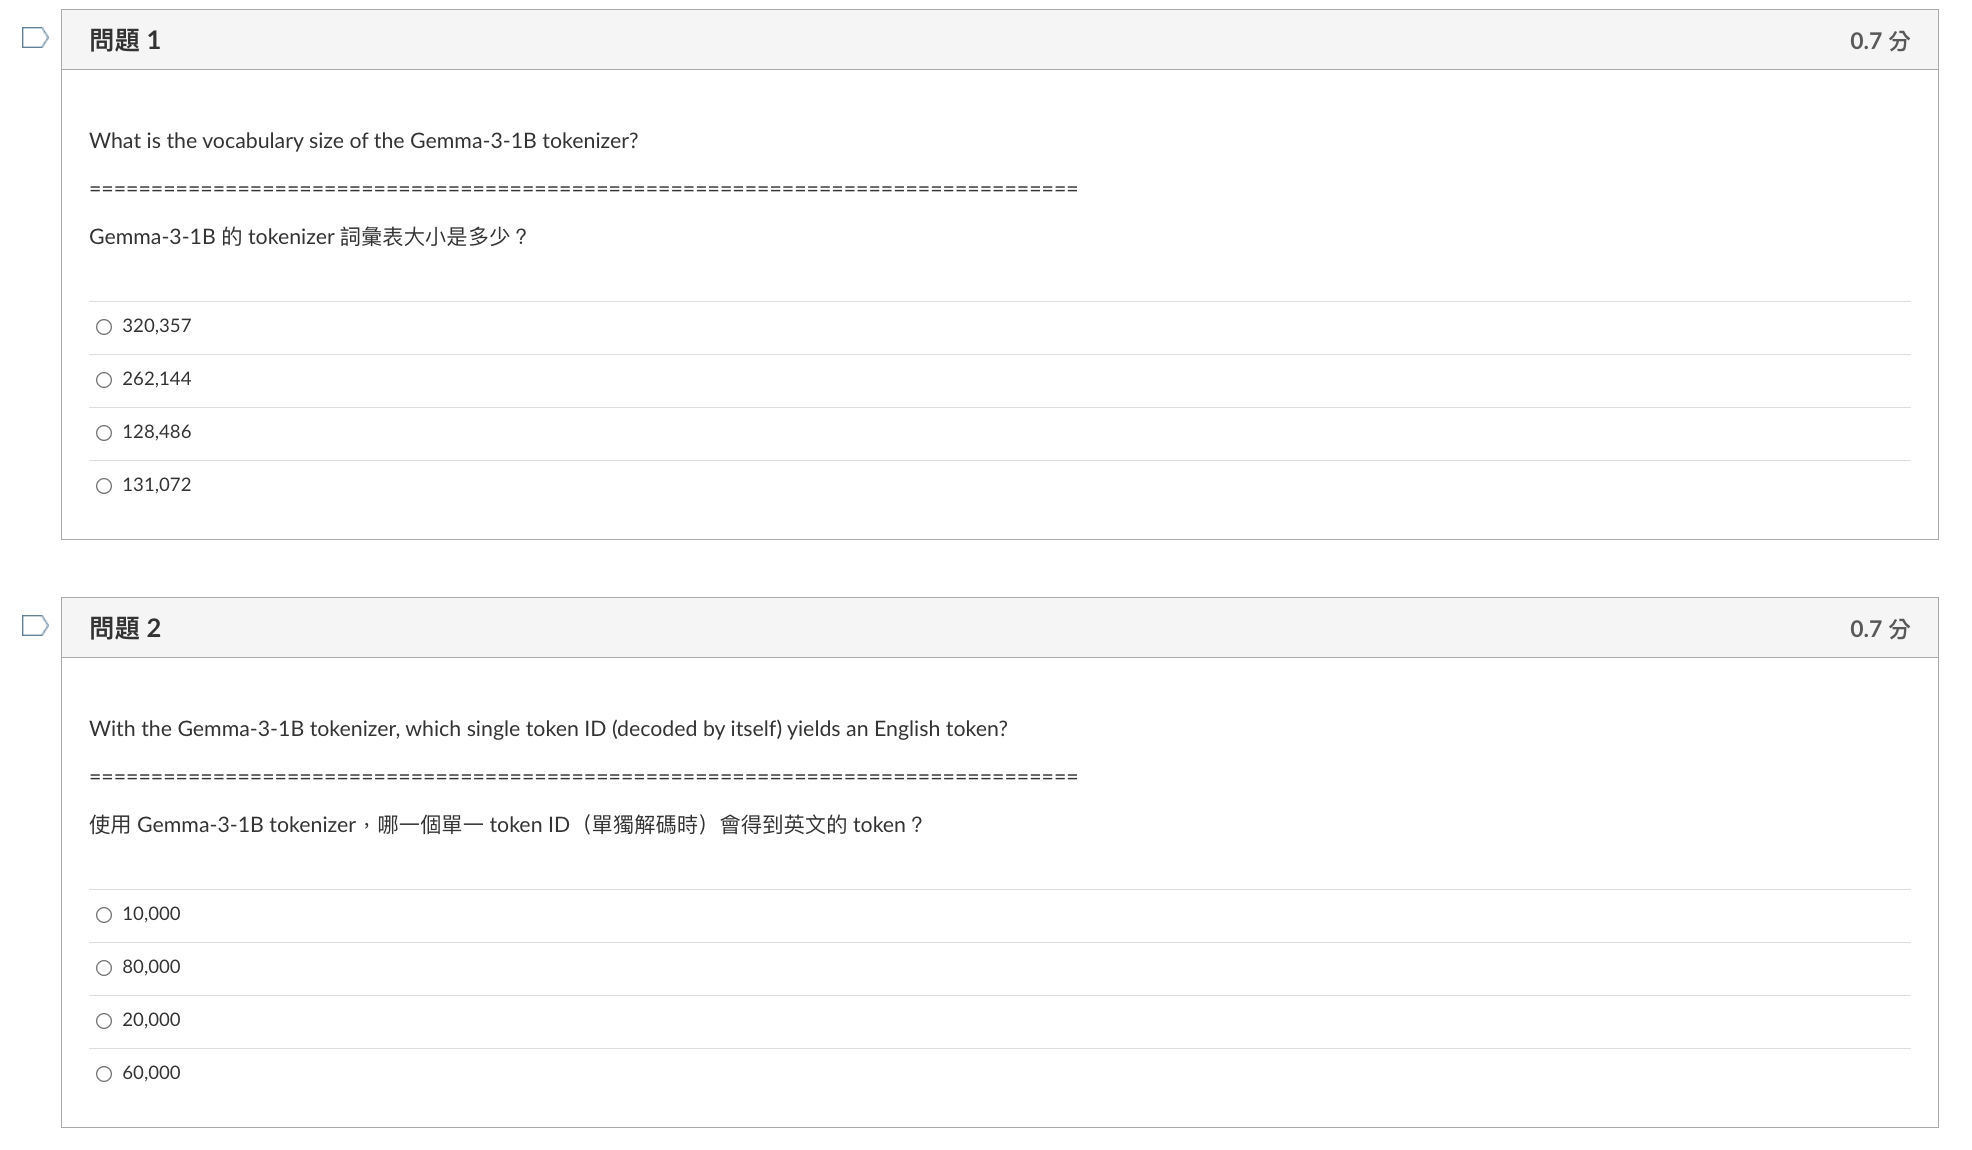 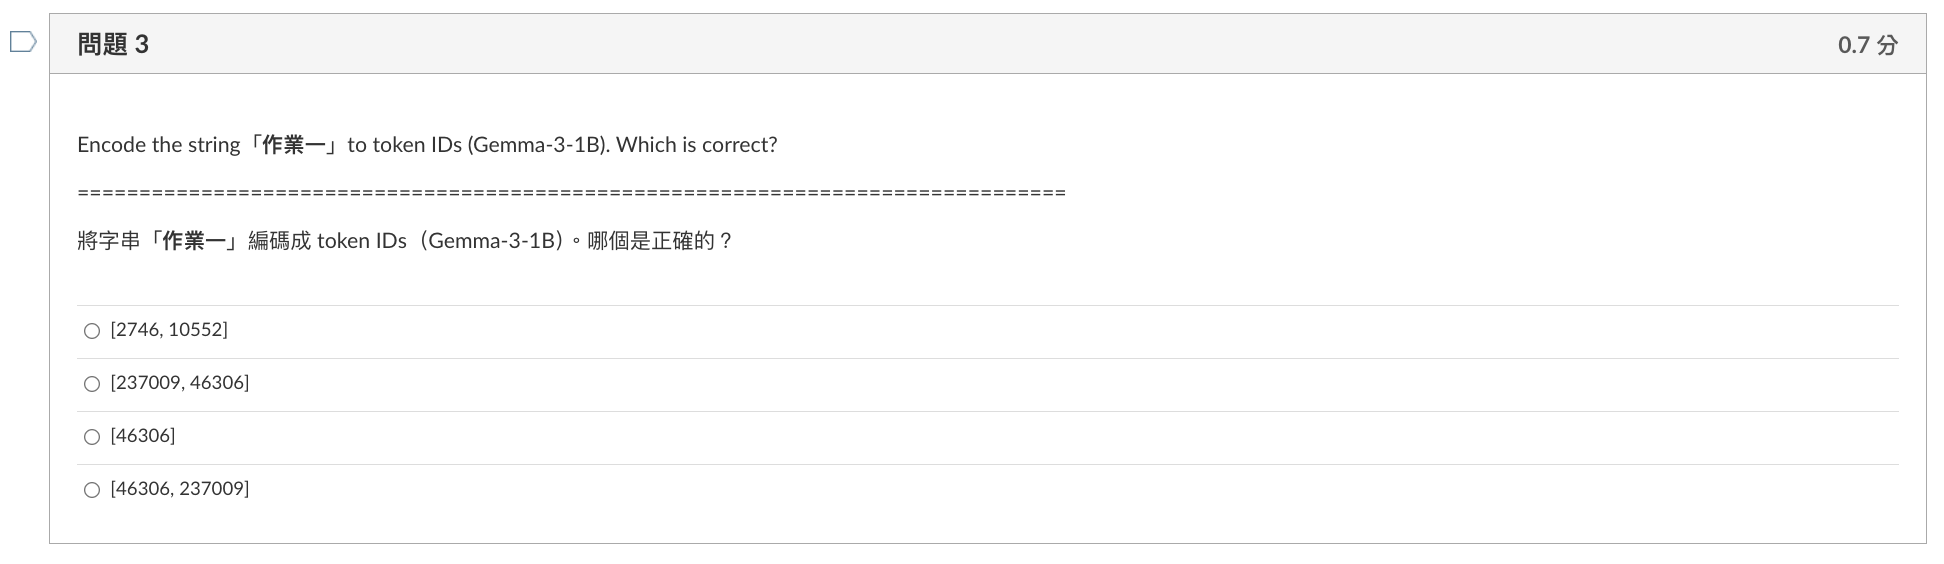

In [ ]:
# Model and Tokenizer Loading for Token Analysis

# Import core transformers components:
# - AutoTokenizer: Automatically loads the appropriate tokenizer for any model
# - AutoModelForCausalLM: Loads causal language models (predict next token given previous tokens)
from transformers import AutoTokenizer, AutoModelForCausalLM

# NOTE: Do NOT change the LLM_NAME if you want to get the right answer of the quiz
# Using google/gemma-3-1b-it for this educational exercise
LLM_NAME = "google/gemma-3-1b-it"

# TOKENIZER SETUP: Convert between text and numerical tokens
# Key configurations for optimal performance on T4 GPU environment:
tokenizer = AutoTokenizer.from_pretrained(
    LLM_NAME,
    device_map="auto"              # Automatically distribute model across available compute devices
                                   # Will use GPU if available, fallback to CPU if needed
)

# MODEL SETUP: Load the actual neural network for text generation
# This contains billions of parameters trained to predict the next token in a sequence
model = AutoModelForCausalLM.from_pretrained(LLM_NAME,device_map="auto")

device = "cuda" if torch.cuda.is_available() else "cpu"

# TODO: Use the loaded model and tokenizer to complete the educational exercises below


The below block is for Question 4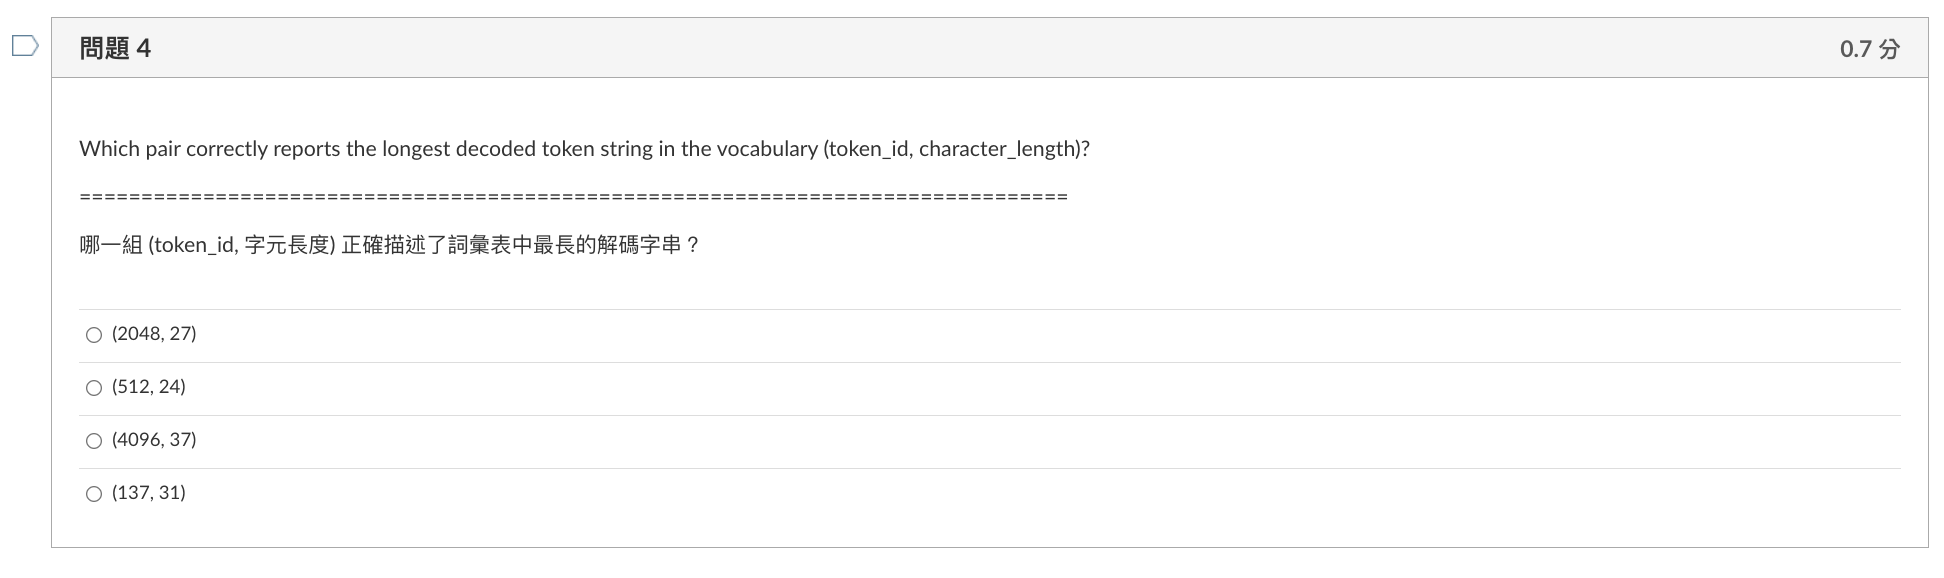

In [ ]:
# Create a comprehensive list to analyze all tokens in the vocabulary
# Each element contains: (token_id, decoded_text, character_length)
tokens_with_length = []

# Iterate through every possible token ID in the model's vocabulary
for token_id in range(tokenizer.vocab_size):
    # Convert numerical token ID back to human-readable text
    # This reveals what text pattern each token represents
    token = tokenizer.decode(token_id)

    # Store the token information with its length for analysis
    tokens_with_length.append((token_id, token, len(token)))

# Sort tokens by decoded text length: longest → shortest
tokens_with_length.sort(key=lambda x: x[2], reverse=True) # reverse=True: longest first, reverse=False: shortest first

token_id, token_str, token_length = tokens_with_length[0]
print("Token id ", token_id, " is：", tokenizer.decode(token_id), "(length:", token_length, ")")

### The below block is for Question 5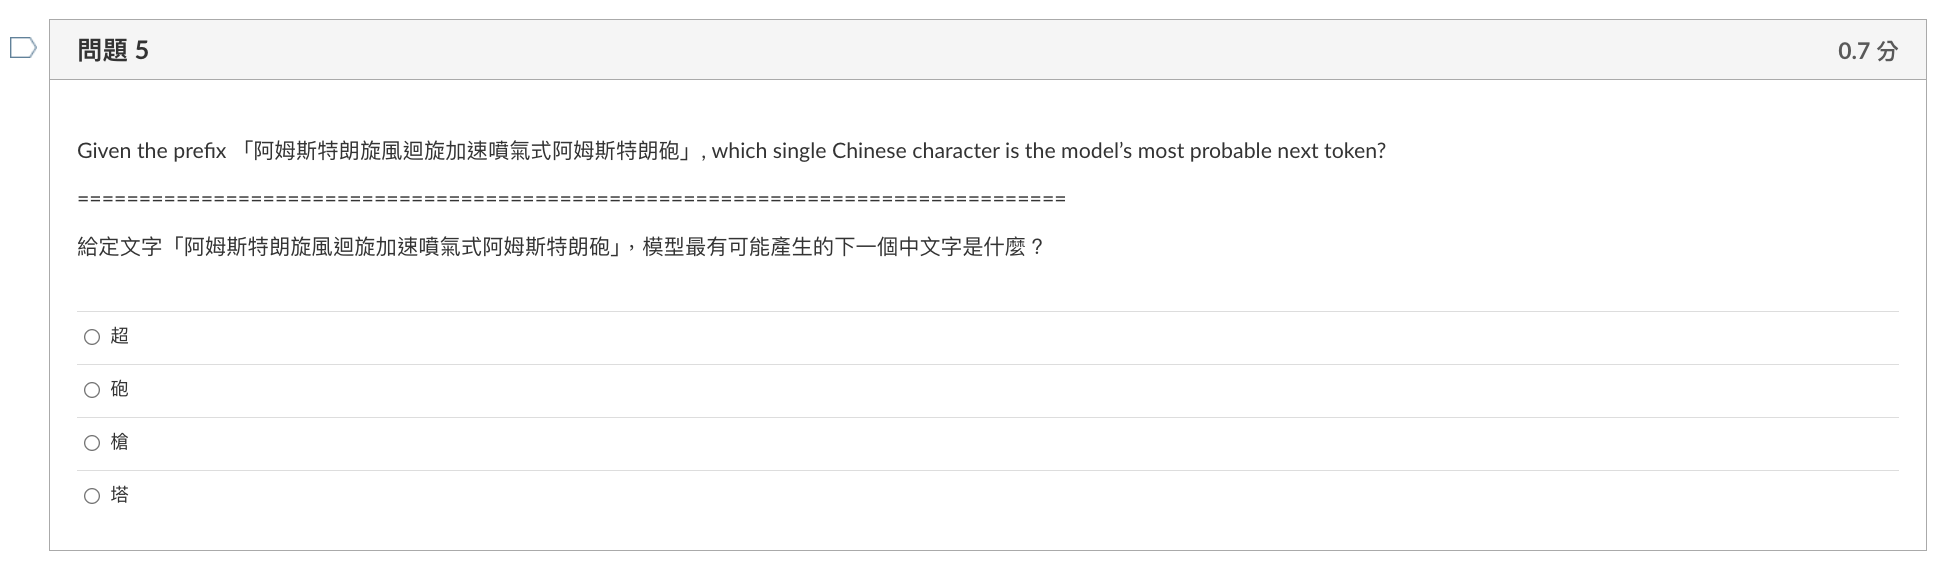

In [ ]:
# TODO: Define the input text as "阿姆斯特朗旋風迴旋加速噴氣式阿姆斯特朗砲"
text = ""  # Replace with the Chinese phrase above for proper analysis
print(f"輸入文字 (Input text): {text}")

# STEP 1: TEXT → TOKENS
# Convert human-readable text into numerical tokens that the model can process
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)

# STEP 2: MODEL FORWARD PASS
# Feed tokens through the neural network to get prediction scores (logits)
# Each position predicts probability distribution over all possible next tokens
outputs = model(input_ids)

# STEP 3: EXTRACT NEXT-TOKEN PREDICTIONS

# TODO: Extract logits for the final position using outputs
# Hints outputs.logits shape: [batch_size, sequence_length, vocab_size]
last_logits = None


# STEP 4: CONVERT SCORES TO PROBABILITIES
# Softmax transforms raw logits into a proper probability distribution (sums to 1.0)
probabilities = torch.softmax(last_logits, dim=-1)

# STEP 5: FIND MOST PROBABLE TOKEN
# argmax returns the token ID with highest probability (greedy selection)
max_prob_token_id = torch.argmax(probabilities, dim=-1).item()
max_probability = probabilities[0, max_prob_token_id].item()

# STEP 6: DECODE BACK TO HUMAN-READABLE TEXT
# Convert the winning token ID back to text to see what the model predicted
next_word = tokenizer.decode(max_prob_token_id)

# RESULTS DISPLAY
print(f"Top-1 next token ID: {max_prob_token_id}")
print(f"Decoded text: '{next_word}'")
print(f"Probability: {max_probability:.4f} ({max_probability*100:.2f}%)")

# Part 2: System and User Prompt Engineering

## Educational Objectives:
1. **Prompt Engineering**: Learn how to control AI behavior through system and user prompts
2. **Behavioral Observation**: See how different prompts dramatically change model responses
3. **Practical Assessment**: Experiment with prompt modifications for NTUcool evaluation

## Key Concepts:
- **System Prompt**: Sets the AI's role, personality, and behavioral constraints (like a character description)
- **User Prompt**: The actual question or request from the human user  
- **Chat Templates**: Proper formatting that instruction-tuned models expect for optimal performance
- **Prompt Engineering**: The art and science of crafting prompts to achieve desired AI behavior

### The below block is for Question 6 to 8
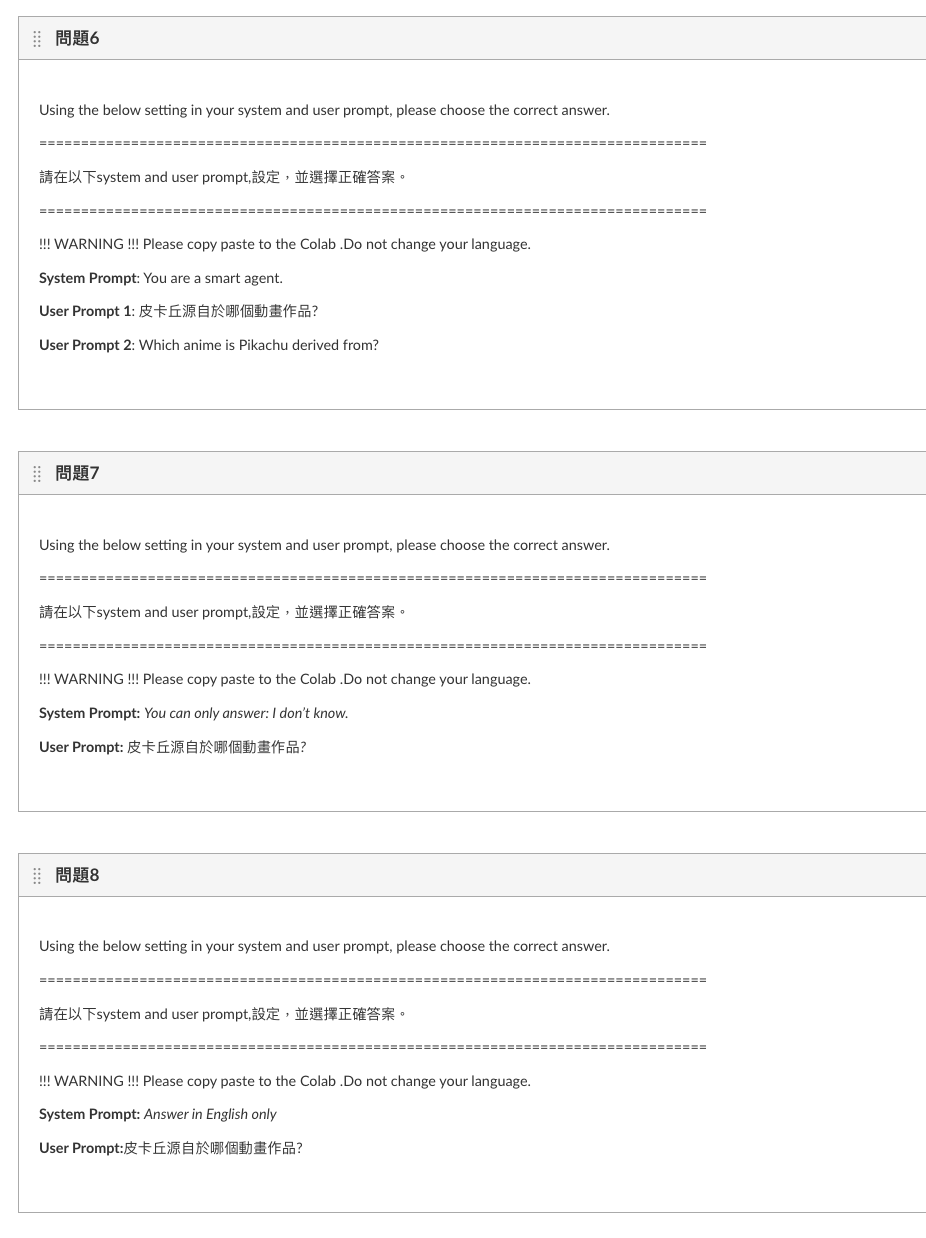

In [ ]:
# TODO: Modify the system_prompt and user_prompt
system_prompt = "You are smart AGI."
user_prompt = "Tell me what is pi"

# CONVERSATION STRUCTURE: Format messages according to chat template expectations
messages = [
    {"role": "system", "content": system_prompt},    # AI behavioral instructions
    {"role": "user", "content": user_prompt}         # Human question/request
]

# STEP 1: APPLY CHAT TEMPLATE
# Convert the message structure into the exact token format the model expects
# add_generation_prompt=True: Adds special tokens that signal the AI should respond
# Different models use different chat templates (Llama vs Gemma vs others)
input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,    # Prompt the model to generate a response
    return_tensors="pt"            # Return PyTorch tensors for model input
).to(device)

# STEP 2: GENERATE RESPONSE
# Use the model to generate a response following the system prompt constraints
outputs = model.generate(
    input_ids,
    max_length=256,                              # Maximum total tokens (input + output)
    do_sample=False,
    pad_token_id=tokenizer.eos_token_id,        # Padding token for batch processing
    attention_mask=torch.ones_like(input_ids)   # Attention mask (all tokens are real, not padding)
)

# STEP 3: EXTRACT AND DECODE NEW CONTENT
# Remove the input portion to get only the AI's generated response
new_ids = outputs[0, input_ids.shape[1]:]       # Slice out only new tokens
response = tokenizer.decode(new_ids, skip_special_tokens=True).strip()

print("AI response:", response)

# Part 3: Multi-Turn Conversation Implementation

## Educational Objectives:
1. **Conversation Memory**: Learn how AI maintains context across multiple exchanges
2. **Message Management**: Understand how to structure conversation history for optimal AI performance
3. **Interactive Systems**: Build the foundation for chatbot and assistant applications

## Key Concepts:
- **Multi-Turn Dialogue**: Conversations with multiple back-and-forth exchanges (like real conversations)
- **Context Preservation**: Maintaining conversation history so AI remembers previous interactions
- **Message Arrays**: Structured format for storing conversation history with proper role assignments
- **Conversation Flow**: How AI uses previous context to generate contextually appropriate responses

### The below block is for Question 11
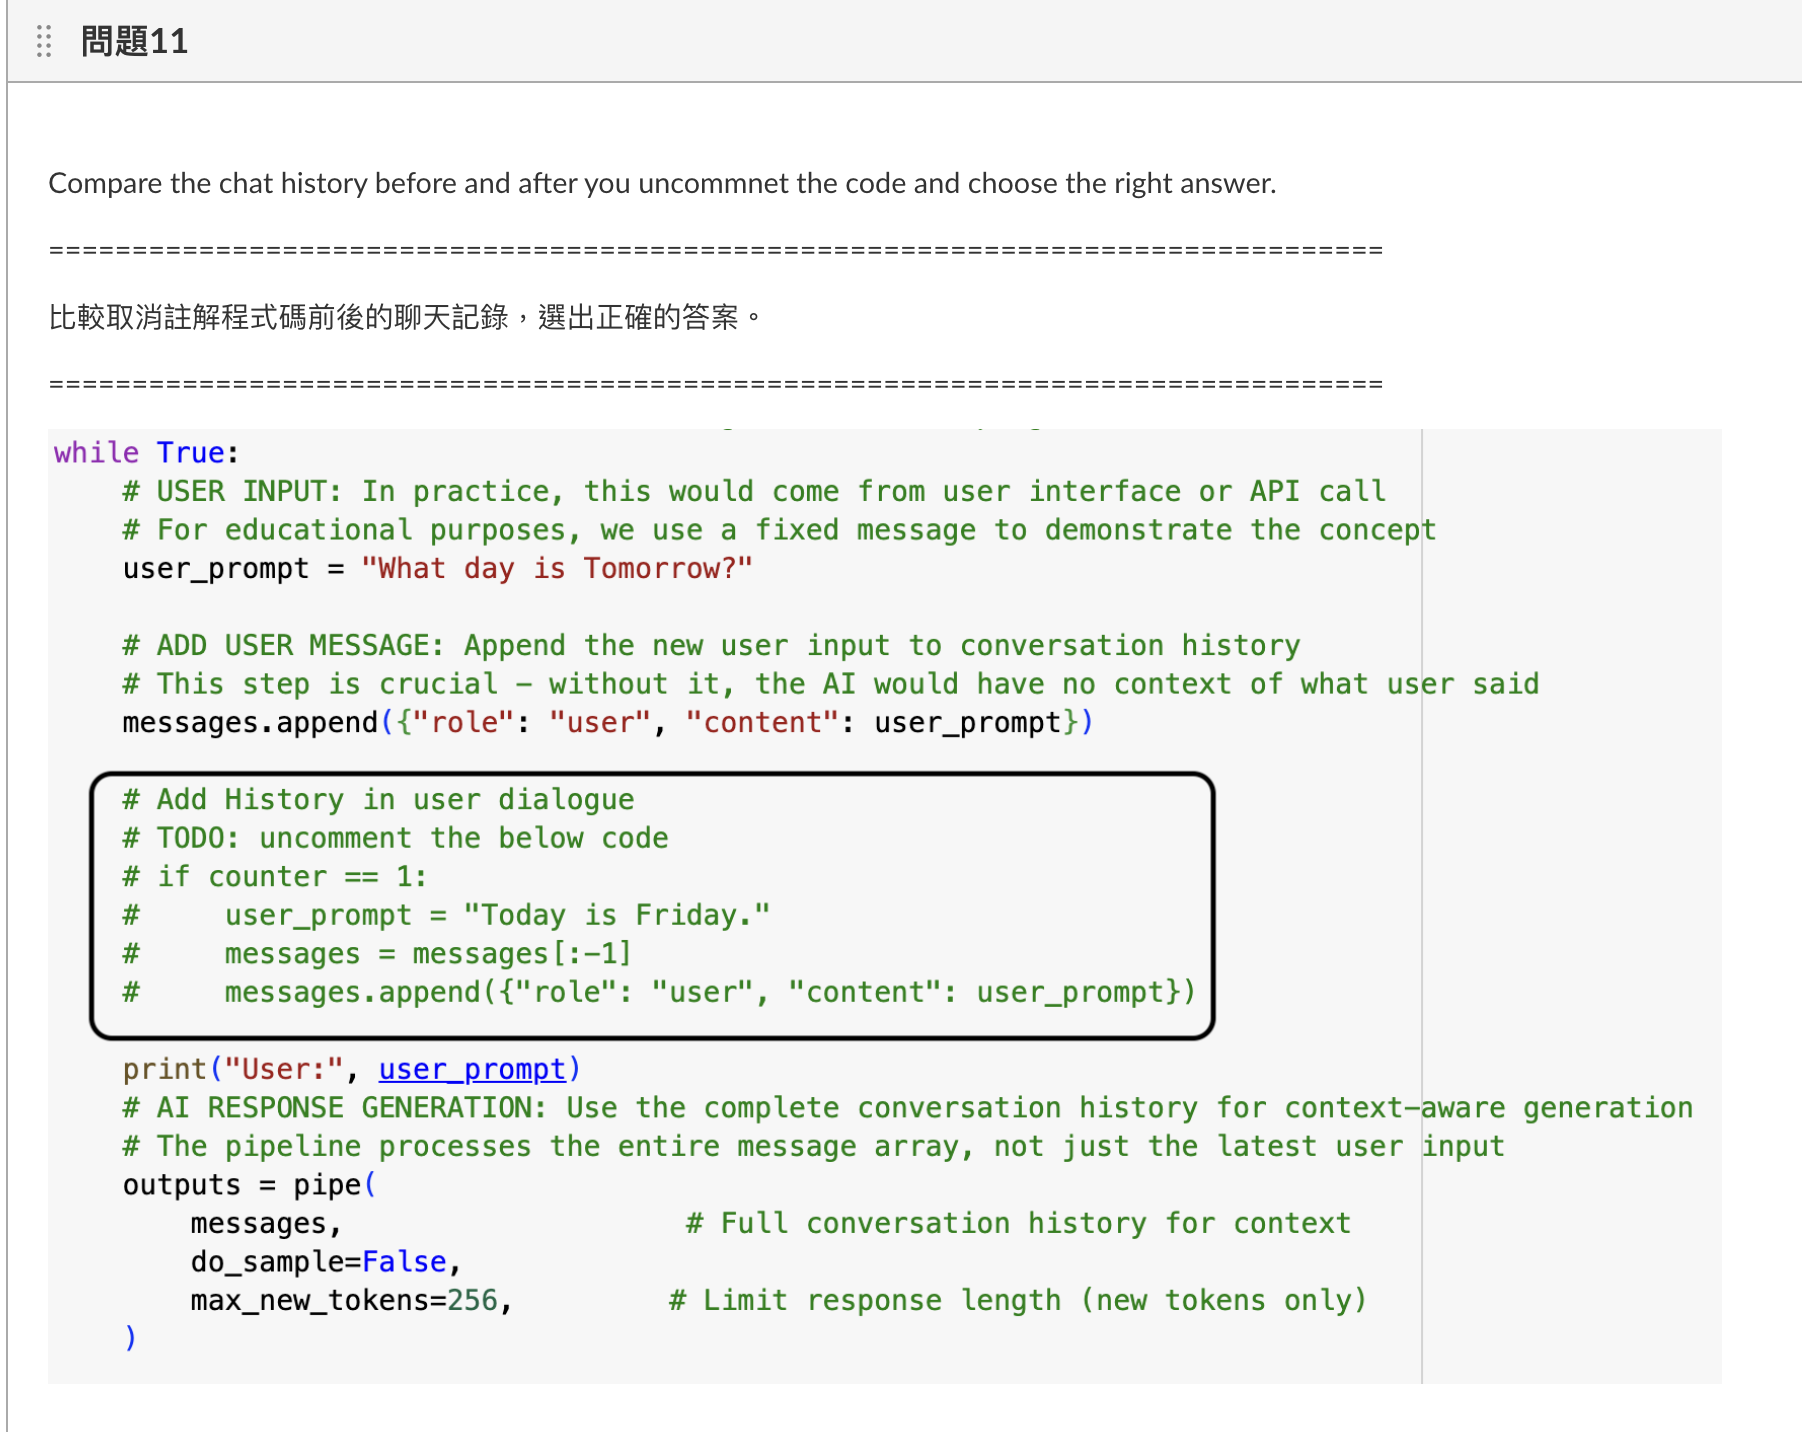

In [ ]:
# Implementation: Multi-Turn Conversation System with HuggingFace Pipeline
# This demonstrates how to build an interactive AI that remembers conversation history

# Import the high-level pipeline API for simplified text generation
from transformers import pipeline

# Disable PyTorch's dynamic compilation for stability in educational environments
# This prevents potential compilation errors that can confuse beginners
torch._dynamo.config.disable = True

# PIPELINE SETUP: High-level interface for text generation
# Pipelines abstract away many low-level details, making AI interaction more accessible
pipe = pipeline(
    "text-generation",    # Task type: generate text given input
    LLM_NAME,            # The specific model to use (defined earlier)
    use_fast=False       # Use slower but more reliable tokenizer (good for learning)
)

# CONVERSATION MEMORY: Initialize the message history array
# This array maintains the complete conversation context across all interactions
# Each message has a "role" (system/user/assistant) and "content" (the actual text)
messages = [
    {"role": "system", "content": "You are a smart agent."}  # Set AI personality/behavior
]

# CONVERSATION LOOP: Simulate interactive chat experience
# In real applications, this would connect to a user interface or API
counter = 1  # Turn counter for tracking conversation progress
while True:
    # USER INPUT: In practice, this would come from user interface or API call
    # For educational purposes, we use a fixed message to demonstrate the concept
    user_prompt = "What day is Tomorrow?"

    # ADD USER MESSAGE: Append the new user input to conversation history
    # This step is crucial - without it, the AI would have no context of what user said
    messages.append({"role": "user", "content": user_prompt})

    # Add History in user dialogue
    # TODO: uncomment the below code
    # if counter == 1:
    #     user_prompt = "Today is Friday."
    #     messages = messages[:-1]
    #     messages.append({"role": "user", "content": user_prompt})

    print("User:", user_prompt)
    # AI RESPONSE GENERATION: Use the complete conversation history for context-aware generation
    # The pipeline processes the entire message array, not just the latest user input
    outputs = pipe(
        messages,                    # Full conversation history for context
        do_sample=False,
        max_new_tokens=256,         # Limit response length (new tokens only)
    )

    # EXTRACT AI RESPONSE: Parse the pipeline output to get just the AI's response
    # Pipeline returns the full conversation + new AI response, so we extract the last message
    response = outputs[0]["generated_text"][-1]['content']

    # CLEAN UP RESPONSE: Remove any special tokens that might appear in raw output
    # Models sometimes generate special control tokens that should be hidden from users
    response = response.replace("<end_of_turn>", "").strip()
    print("Assistant:", response)

    # CRITICAL STEP: Add AI response to conversation history
    messages.append({"role": "assistant", "content": response})

    # Counter adder and the session break
    if counter == 2:
        break
    counter += 1


# Part 4: Interactive Web Interface with Gradio

## Educational Objectives:
1. **User Interface Development**: Learn to create accessible web interfaces for AI applications
2. **Real-time Interaction**: Build systems for live conversation with language models
3. **Parameter Control**: Understand how generation parameters affect AI behavior and output quality
4. **Production Deployment**: Explore how to make AI models accessible to end users

## Key Concepts:
- **Gradio Framework**: Python library for creating web interfaces for machine learning models
- **Generation Parameters**: Settings that control AI creativity, consistency, and response style
- **State Management**: Maintaining conversation history and user interface state across interactions
- **Event Handling**: Responding to user actions (clicks, text input, parameter changes) in real-time

In [ ]:
# Required Libraries for Advanced Web Interface Development
# These imports provide the foundation for creating an interactive AI chatbot interface

import os, torch, transformers, gradio as gr
from transformers import (
    AutoModelForCausalLM,    # Core language model for text generation
    AutoTokenizer,           # Text tokenization and encoding utilities
)
import threading             # Multi-threading support for responsive UI (if needed)

In [ ]:
# Complete Interactive AI Chatbot Implementation with Gradio
# This comprehensive example demonstrates production-ready AI interface development

# ================================================================================================
# MODEL SETUP AND CONFIGURATION
# ================================================================================================

# Load the specified language model and tokenizer for the interface
LLM_NAME = "google/gemma-3-1b-it"  # Instruction-tuned Gemma model suitable for conversation

# TOKENIZER CONFIGURATION: Optimized for T4 GPU performance
tokenizer = AutoTokenizer.from_pretrained(
    LLM_NAME,
    torch_dtype=torch.float16,     # Memory optimization: Use fp16 precision (T4 GPU compatible)
    device_map="auto"              # Automatically distribute across available compute devices
)

# MODEL LOADING: Load the neural network for text generation
model = AutoModelForCausalLM.from_pretrained(LLM_NAME,device_map="auto")
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

In [ ]:
# ================================================================================================
# CORE CONVERSATION FUNCTIONS
# ================================================================================================

def format_chat_prompt(message, history):
    """
    Converts user input and conversation history into proper chat template format

    This function is crucial for maintaining conversation context and ensuring
    the model receives input in the format it was trained to expect.

    Args:
        message (str): Current user message/question
        history (list): List of (user_msg, assistant_msg) tuples from previous conversations

    Returns:
        list: Properly formatted messages array with roles and content

    Technical Details:
        - Gradio history format: [(user1, bot1), (user2, bot2), ...]
        - Model expected format: [{"role": "user", "content": "..."}, {"role": "assistant", "content": "..."}, ...]
        - System prompts define AI personality and behavioral guidelines
    """
    messages = []

    # SYSTEM PROMPT: Define AI personality and behavioral constraints
    # This sets the foundation for how the AI will behave throughout the conversation
    # Try experimenting with different system prompts to see dramatic behavior changes
    messages.append({"role": "system", "content": "你是一個有幫助的AI助手，請用繁體中文回答問題。"})

    # CONVERSATION HISTORY: Add all previous exchanges to maintain context
    # This enables the AI to reference earlier parts of the conversation
    for user_msg, assistant_msg in history:
        messages.append({"role": "user", "content": user_msg})
        messages.append({"role": "assistant", "content": assistant_msg})

    # CURRENT MESSAGE: Add the user's latest input
    messages.append({"role": "user", "content": message})

    return messages

def generate_response(message, history, max_length=100, temperature=0.7, top_k=10):
    """
    Generate AI response using the language model with configurable parameters

    This function demonstrates key concepts in LLM text generation including
    sampling strategies, parameter tuning, and error handling.

    Args:
        message (str): Current user input to respond to
        history (list): Previous conversation exchanges for context
        max_length (int): Maximum number of new tokens to generate (controls response length)
        temperature (float): Sampling temperature - higher values = more creative/random responses
                           - 0.1: Very focused, deterministic responses
                           - 0.7: Balanced creativity and coherence (good default)
                           - 1.5: Highly creative but potentially less coherent
        top_k (int): Top-k sampling - only consider the k most probable next tokens
                    - Lower values (5-10): More focused responses
                    - Higher values (50+): More diverse vocabulary usage

    Returns:
        str: Generated AI response or error message

    Educational Notes:
        - Temperature and top_k are key hyperparameters that dramatically affect output quality
        - Different tasks benefit from different parameter settings
        - Error handling is crucial for production AI applications
    """
    try:
        # STEP 1: FORMAT CONVERSATION
        # Convert the user input and history into the model's expected chat format
        messages = format_chat_prompt(message, history)

        # STEP 2: APPLY CHAT TEMPLATE
        # Transform messages into the exact token sequence the model expects
        # Different models (Llama, Gemma, etc.) use different chat templates
        input_ids = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,  # Add special tokens that prompt the model to respond
            return_tensors="pt"          # Return PyTorch tensors for model consumption
        ).to(device)

        # STEP 3: GENERATE RESPONSE
        # Use the model to generate new tokens based on the conversation context
        with torch.no_grad():  # Disable gradient computation for inference (saves memory and compute)
            outputs = model.generate(
                input_ids,
                # LENGTH CONTROL
                max_length=input_ids.shape[1] + max_length,  # Total tokens = input + new generation

                # SAMPLING STRATEGY PARAMETERS
                temperature=float(temperature),                      # Controls randomness vs determinism
                top_k=top_k,                                 # Limits vocabulary to top-k most probable tokens
                do_sample=True,                              # Enable probabilistic sampling (not greedy)

                # TECHNICAL CONFIGURATION
                pad_token_id=tokenizer.eos_token_id,        # Token used for padding in batch processing
                attention_mask=torch.ones_like(input_ids)    # Mask indicating which tokens are real vs padding
            )

        # STEP 4: DECODE RESPONSE
        # Convert the generated token IDs back to human-readable text
        # Only decode the newly generated portion (exclude the input prompt)
        response = tokenizer.decode(outputs[0][input_ids.shape[1]:], skip_special_tokens=True)
        return response.strip()

    except Exception as e:
        # PRODUCTION ERROR HANDLING
        # In real applications, comprehensive error handling prevents crashes and provides useful feedback
        return f"生成回應時發生錯誤 (Error during response generation): {str(e)}"

def chat_interface(message, history, max_length, temperature, top_k):
    """
    Main interface function that handles user interactions and updates conversation state

    This function serves as the bridge between the Gradio UI and the AI model,
    managing conversation flow and state updates.

    Args:
        message (str): User's input message
        history (list): Current conversation history in Gradio format
        max_length (int): Generation length parameter from UI slider
        temperature (float): Temperature parameter from UI slider
        top_k (int): Top-k parameter from UI slider

    Returns:
        tuple: (updated_history, empty_string_to_clear_input)

    Design Notes:
        - Returning empty string clears the input textbox for next user message
        - History is updated with the new conversation turn
        - All generation parameters are passed through from UI controls
    """
    # INPUT VALIDATION: Skip processing if user sends empty message
    if not message.strip():
        return history, ""

    # GENERATE AI RESPONSE: Use current UI parameter settings
    response = generate_response(message, history, max_length, temperature, top_k)

    # UPDATE CONVERSATION HISTORY: Add the new exchange to the conversation
    # Gradio chatbot expects (user_message, ai_response) tuple format
    history.append((message, response))

    # RETURN UPDATED STATE: Clear input field and update chat display
    return history, ""  # Empty string clears the message input textbox

# ================================================================================================
# GRADIO USER INTERFACE CONSTRUCTION
# ================================================================================================

# Create the main Gradio interface with modern, user-friendly design
with gr.Blocks(title="LLM 聊天機器人", theme=gr.themes.Soft()) as demo:
    # HEADER SECTION: Title and description for users
    gr.Markdown("# 🤖 大型語言模型聊天機器人")
    gr.Markdown("這是一個使用Transformers和Gradio建立的LLM聊天介面")

    # MAIN LAYOUT: Two-column design for optimal user experience
    with gr.Row():
        # LEFT COLUMN: Primary chat interface (takes most screen space)
        with gr.Column(scale=3):
            # CHATBOT DISPLAY: Shows conversation history with scrollable interface
            chatbot = gr.Chatbot(
                value=[],           # Initialize with empty conversation
                height=400,         # Fixed height for consistent layout
                label="對話記錄"     # Display label for accessibility
            )

            # USER INPUT: Multi-line text input for user messages
            msg = gr.Textbox(
                label="輸入您的訊息",
                placeholder="請輸入您想問的問題...",
                lines=2             # Allow multi-line input for longer messages
            )

            # CONTROL BUTTONS: Action buttons for user interaction
            with gr.Row():
                send_btn = gr.Button("發送", variant="primary")  # Primary action button
                clear_btn = gr.Button("清除對話")                # Secondary action for reset

        # RIGHT COLUMN: Parameter controls and documentation (smaller width)
        with gr.Column(scale=1):
            gr.Markdown("### 🔧 生成參數")

            # GENERATION PARAMETER CONTROLS
            # These sliders allow real-time experimentation with model behavior

            # MAX LENGTH SLIDER: Controls response length
            max_length = gr.Slider(
                minimum=10,          # Minimum response length
                maximum=200,         # Maximum response length
                value=100,           # Default balanced length
                step=10,             # Increment size
                label="Max Length"  # Maximum generation length
            )

            # TEMPERATURE SLIDER: Controls creativity vs consistency
            temperature = gr.Slider(
                minimum=0.1,         # Very deterministic
                maximum=2.0,         # Very creative
                value=0.7,           # Balanced default
                step=0.1,            # Fine-grained control
                label="Temperature (creativity)"
            )

            # TOP-K SLIDER: Controls vocabulary diversity
            top_k = gr.Slider(
                minimum=1,           # Most restrictive
                maximum=50,          # Most diverse
                value=10,            # Moderate diversity
                step=1,              # Integer steps
                label="Top-k"     # Top-k sampling
            )

            # HELP DOCUMENTATION: Embedded user guide
            gr.Markdown("### 📝 使用說明")
            gr.Markdown("""
            - **Max Length**: 控制AI回應的最大token數
            - **temperature**: 控制softmax分布的平滑程度，數值越高，回應越有創意但可能不太準確
            - **Top-k**: 每次取樣時，僅從機率最高的 k 個字詞中挑選下一個 token

            **實驗建議**:
            - 創意寫作: temperature 1.0-1.5, Top-k 20-50
            - 技術問答: temperature 0.3-0.7, Top-k 5-15
            - 事實查詢: temperature 0.1-0.5, Top-k 3-10
            """)

    # ================================================================================================
    # EVENT HANDLING: Connect UI components to backend functions
    # ================================================================================================

    # Define helper functions for event handling
    def send_message(message, history, max_len, temp, k):
        """Handle send button clicks and enter key presses"""
        return chat_interface(message, history, max_len, temp, k)

    def clear_chat():
        """Reset conversation to initial state"""
        return [], ""  # Clear both history and input field

    # BIND EVENTS TO UI COMPONENTS

    # Send button click event
    send_btn.click(
        send_message,
        inputs=[msg, chatbot, max_length, temperature, top_k],  # All required inputs
        outputs=[chatbot, msg]                                   # Updated outputs
    )

    # Enter key press in message textbox (common user expectation)
    msg.submit(
        send_message,
        inputs=[msg, chatbot, max_length, temperature, top_k],
        outputs=[chatbot, msg]
    )

    # Clear button click event
    clear_btn.click(
        clear_chat,
        outputs=[chatbot, msg]  # Reset both conversation and input
    )

# ================================================================================================
# INTERFACE LAUNCH: Deploy the application
# ================================================================================================

# Launch the Gradio interface with production-ready configuration
demo.launch(
    share=True,  # Create public URL for sharing (useful in Colab/cloud environments)
    debug=True   # Enable debug mode for development and learning
)


/tmp/ipython-input-3400651657.py:163: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://705e7b0a98f4589f9f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://705e7b0a98f4589f9f.gradio.live
